In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split # train-test split
from sklearn.metrics import confusion_matrix, classification_report # classification metrics
from imblearn.over_sampling import SMOTE # SMOTE
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler # scaling methods
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV # grid search cross validation
from sklearn.model_selection import RandomizedSearchCV # randomized search cross validation

# supervised learning algorithms
from sklearn.naive_bayes import GaussianNB # Gaussain Naive Bayes


# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# combining trian and test datasets

df = pd.concat([pd.read_csv('fraudTrain.csv'),pd.read_csv('fraudTest.csv')], ignore_index=True)
df.drop('Unnamed: 0',axis=1,inplace=True) # unnecessary column
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
# Checking Null values
pd.DataFrame(df.isnull().value_counts())

,,,,,,,,,,,,,,,,,,,,,,0
trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,
False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1852394


In [5]:
# Binarizing Gender column
def gender_binarizer(x):
    if x=='F':
        return 1
    if x=='M':
        return 0
    
df['gender'] = df['gender'].transform(gender_binarizer)

In [6]:
# Seperating nominal from numeric
# Note:There are almost 2M records in dfz.In order to avoid the heavy calculation,only the first 100000 rows were selected.
df2 = df.loc[:99999,df.dtypes!=np.object]
df2

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,2703186189652095,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0
1,630423337322,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0
2,38859492057661,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0
3,3534093764340240,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0
4,375534208663984,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...
99995,2475085306462014,95.14,56152,44.2378,-95.2739,1507,1330443409,44.718105,-95.843397,0
99996,4005676619255478,8.75,70726,30.4590,-90.9027,71335,1330443447,29.931844,-90.610715,0
99997,3519232971341141,34.20,43903,40.4731,-80.9596,2208,1330443454,41.076153,-80.506107,0
99998,4040099974063068803,73.11,58769,48.3396,-102.2400,229,1330443491,48.535070,-102.524262,0


## Train Test Split

In [7]:
X = df2.drop(['cc_num','is_fraud'],axis=1)
y = df2['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Resampling via SMOTE

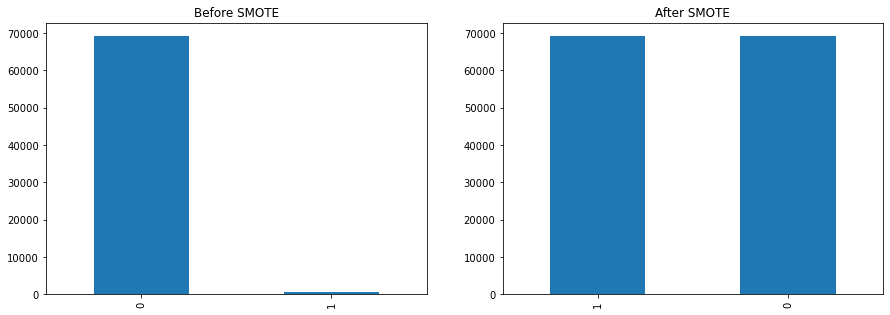

In [8]:
sm = SMOTE()
X_train_new, y_train_new = sm.fit_resample(X_train, y_train.ravel())

# to demonstrate the effect of SMOTE over imbalanced datasets
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize =(15, 5))
ax1.set_title('Before SMOTE')
pd.Series(y_train).value_counts().plot.bar(ax=ax1)

ax2.set_title('After SMOTE')  
pd.Series(y_train_new).value_counts().plot.bar(ax=ax2)

plt.show()

In [9]:
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

The dataset is heavily imbalanced. Through resampling, fraud transactions (Class = 1) are randomly increased to the same amount as non-fraud transactions (Class = 0) in order to avoid the bias results toward the non-fraudulent class.

## Scaling

### Robust Scaler VS MinMaxScaler VS Standard Scaler

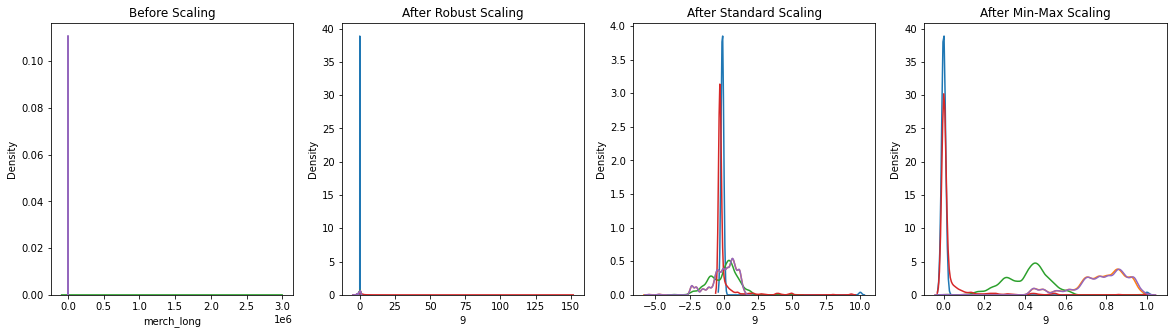

In [10]:
# to compare the effect of each scaler on our dataset
scaler = RobustScaler()
robust_df = scaler.fit_transform(df2)
robust_df = pd.DataFrame(robust_df)
  
scaler = StandardScaler()
standard_df = scaler.fit_transform(df2)
standard_df = pd.DataFrame(standard_df)
  
scaler = MinMaxScaler()
minmax_df = scaler.fit_transform(df2)
minmax_df = pd.DataFrame(minmax_df)

# using KDE plot
#Note: some columns are opted out in order to speed up the process
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(df2['merch_long'], ax = ax1)
sns.kdeplot(df2['merch_lat'], ax = ax1)
sns.kdeplot(df2['city_pop'], ax = ax1)
sns.kdeplot(df2['long'], ax = ax1)
sns.kdeplot(df2['lat'], ax = ax1)


ax2.set_title('After Robust Scaling')  
sns.kdeplot(robust_df[9], ax = ax2)
sns.kdeplot(robust_df[8], ax = ax2)
sns.kdeplot(robust_df[7], ax = ax2)
sns.kdeplot(robust_df[5], ax = ax2)
sns.kdeplot(robust_df[4], ax = ax2)


ax3.set_title('After Standard Scaling')  
sns.kdeplot(standard_df[9], ax = ax3)
sns.kdeplot(standard_df[8], ax = ax3)
sns.kdeplot(standard_df[7], ax = ax3)
sns.kdeplot(standard_df[5], ax = ax3)
sns.kdeplot(standard_df[4], ax = ax3)


ax4.set_title('After Min-Max Scaling')  
sns.kdeplot(minmax_df[9], ax = ax4)
sns.kdeplot(minmax_df[8], ax = ax4)
sns.kdeplot(minmax_df[7], ax = ax4)
sns.kdeplot(minmax_df[5], ax = ax4)
sns.kdeplot(minmax_df[4], ax = ax4)

plt.show()

Since we have a huge amount of data, its better to normalize the dataset by using RobustScaler which scales the data according to the quantile range.


In [12]:
scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Gaussian Naive Bayes

In [24]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_pred = gnb.predict(X_test)

print(confusion_matrix(y_test,gnb_pred))
print('\n')
print(classification_report(y_test,gnb_pred))
print(gnb_pred)

[[28290  1408]
 [  101   201]]


              precision    recall  f1-score   support

           0       1.00      0.95      0.97     29698
           1       0.12      0.67      0.21       302

    accuracy                           0.95     30000
   macro avg       0.56      0.81      0.59     30000
weighted avg       0.99      0.95      0.97     30000

[0 0 1 ... 0 0 0]


In [22]:
print("Model Accuracy:", round(accuracy_score(y_test, gnb_pred),4))
print("Model Precision:", round(precision_score(y_test, gnb_pred),4))
print("Model Recall:", round(recall_score(y_test, gnb_pred),4))

Model Accuracy: 0.9497
Model Precision: 0.1249
Model Recall: 0.6656


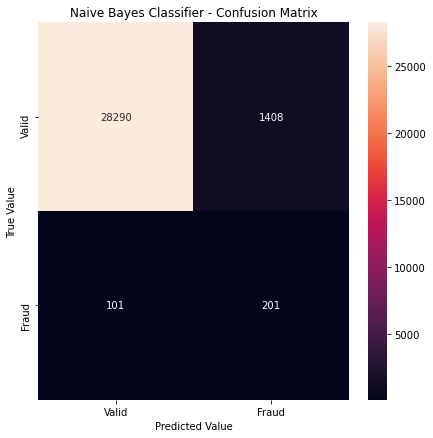

In [25]:
labels= ['Valid', 'Fraud'] 
conf_matrix=confusion_matrix(y_test, gnb_pred) 
plt.figure(figsize=(6, 6)) 
sns.heatmap(conf_matrix, xticklabels= labels, yticklabels= labels, annot=True, fmt="d")
plt.title("Naive Bayes Classifier - Confusion Matrix") 
plt.tight_layout()
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()

# Classification Evaluation via AUROC

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score


# Instantiate the classfiers and make a list
classifier = GaussianNB()

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifier', 'fpr','tpr','auc'])

# Train the models and record the results
model = cls.fit(X_train, y_train)
yproba = model.predict_proba(X_test)[::,1]
    
fpr, tpr, _ = roc_curve(y_test,  yproba)
auc = roc_auc_score(y_test, yproba)
    
result_table = result_table.append({'classifier':cls.__class__.__name__,'fpr':fpr,'tpr':tpr,'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifier', inplace=True)

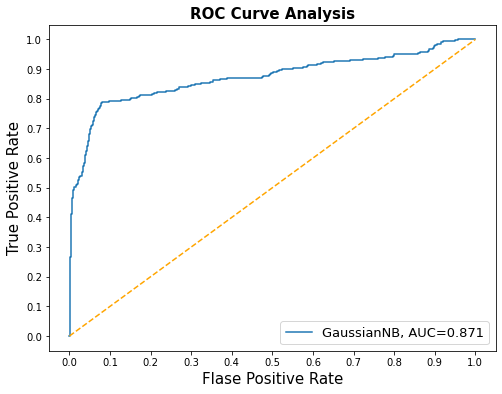

In [18]:
# Plotting ROC curve 

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()